In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

file_path = 'C:/Users/Johan/OneDrive/Documents/GitHub/Databehandling-Johan-Clausen-Lind/Data/Folkhalsomyndigheten_Covid19.xlsx'
file_path_vaccine = 'C:/Users/Johan/OneDrive/Documents/GitHub/Databehandling-Johan-Clausen-Lind/Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx'
covid_vaccine_data = pd.read_excel(file_path_vaccine)
covid_data = pd.read_excel(file_path)
veckodata_riket = pd.read_excel(file_path, sheet_name='Veckodata Riket')
Vaccinerade_kommun_ålder = pd.read_excel(file_path_vaccine, sheet_name='Vaccinerade kommun och ålder')


In [ ]:
veckodata_riket.info()

In [ ]:
veckodata_riket.describe()

In [ ]:
veckodata_riket.value_counts()

In [ ]:
veckodata_riket.head()

In [ ]:
veckodata_riket.columns

In [ ]:
veckodata_riket.index

In [3]:
veckodata_riket['Vecka'] = veckodata_riket['år'].astype(str) + 'v' + veckodata_riket['veckonummer'].astype(str)
veckodata_riket = veckodata_riket.drop(columns=['år', 'veckonummer'])
veckodata_riket.head()


,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


In [ ]:
# Ställ in storleken på hela figuren
plt.figure(figsize=(12, 10))

# Subplot 1: Antal avlidna per vecka
plt.subplot(2, 2, 1) # (rows, columns, panel number)
sns.lineplot(data=veckodata_riket, x='Vecka', y='Antal_avlidna_vecka')
plt.title('Antal Avlidna per Vecka')
plt.xticks(rotation=45)

In [ ]:
fig = px.line(veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', title='Antal Avlidna per Vecka')
fig.show()


In [ ]:
# Ställ in storleken på hela figuren
plt.figure(figsize=(12, 10))

# Subplot 1: Antal avlidna per vecka
plt.subplot(2, 2, 1) # (rows, columns, panel number)
sns.lineplot(data=veckodata_riket, x='Vecka', y='Antal_fall_vecka')
plt.title('Antal nya fall per vecka')
plt.xticks(rotation=45)

In [ ]:
fig = px.line(veckodata_riket, x='Vecka', y='Antal_fall_vecka', title='Antal nya fall per vecka')
fig.show()


In [ ]:
plt.subplot(2, 2, 3) # Tredje positionen i en 2x2 grid
sns.lineplot(data=veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', label='Avlidna Fall')
sns.lineplot(data=veckodata_riket, x='Vecka', y='Antal_fall_vecka', label='Nya Fall')
plt.title('Avlidna Fall och Nya Fall per Vecka')
plt.xticks(rotation=45)
plt.legend()  # Visa en legend för att skilja linjerna


In [ ]:

# Omstrukturera data för Plotly
melted_data = veckodata_riket.melt(id_vars=['Vecka'], 
                                   value_vars=['Antal_avlidna_vecka', 'Antal_fall_vecka'],
                                   var_name='Typ', value_name='Antal')

# Skapa linjediagrammet
fig = px.line(melted_data, x='Vecka', y='Antal', color='Typ', 
             title='Avlidna Fall och Nya Fall per Vecka')
fig.show()


In [ ]:
# Ställ in storleken på hela figuren
plt.figure(figsize=(12, 10))

# Subplot 1: Antal avlidna per vecka
plt.subplot(2, 2, 1) # (rows, columns, panel number)
sns.lineplot(data=veckodata_riket, x='Vecka', y='Kum_antal_fall')
plt.title('Antal fall kumulativt per vecka')
plt.xticks(rotation=45)

In [ ]:
fig = px.line(veckodata_riket, x='Vecka', y='Kum_antal_fall', title='Antal fall kumulativt per vecka')
fig.show()


In [ ]:
Vaccinerade_kommun_ålder.info

In [ ]:
Vaccinerade_kommun_ålder.columns

In [ ]:
antal_län=Vaccinerade_kommun_ålder['Län'].nunique()
print(f'Det finns {antal_län} län i datan.')

In [ ]:
antal_kommuner = Vaccinerade_kommun_ålder['Kommun'].nunique()
print(f'Det finns {antal_kommuner} kommuner i datan.')

In [ ]:
total_befolkning = Vaccinerade_kommun_ålder['Befolkning'].sum()
print(f'Den totala befolkningen är {total_befolkning} individer.')

In [ ]:
Vaccinerade_kommun_ålder.columns
Vaccinerade_kommun_ålder['Ålder']

In [4]:
# Enligt världsbanken finns det 10,42 miljoner människor i Sverige.
# Fick hjälp av chatgpt på funktionen.
def extract_lower_age(age_str):
    if age_str == "90 eller äldre":
        return 90
    return int(age_str.split('-')[0])

# Skapa en ny kolumn med den nedre åldersgränsen
Vaccinerade_kommun_ålder['Nedre_Ålder'] = Vaccinerade_kommun_ålder['Ålder'].apply(extract_lower_age)

# Filtrera datasetet för rader där Nedre_Ålder är under 18
barn_under_18_data = Vaccinerade_kommun_ålder[Vaccinerade_kommun_ålder['Nedre_Ålder'] < 18]

# Summera befolkningen för dessa rader
barn_under_18 = barn_under_18_data['Befolkning'].sum()
print(f"Antal barn under 18 år i Sverige: {barn_under_18}")


Antal barn under 18 år i Sverige: 745370


In [7]:
fig = px.bar(Vaccinerade_kommun_ålder, x='Ålder', y='Befolkning', title='Åldersfördelning av Sveriges Befolkning', color='Kommun')
fig.show()


In [18]:
grupperade_län = Vaccinerade_kommun_ålder.groupby('Län_namn').sum()
print(grupperade_län)

                       Län  Kommun  \
Län_namn                             
Blekinge län           500   53860   
Dalarnas län          3000  308210   
Gotlands län            90    9800   
Gävleborgs län        2100  215290   
Hallands län           780   82250   
Jämtlands län         1840  186180   
Jönköpings län         780   86200   
Kalmar län             960  103730   
Kronobergs län         560   61410   
Norrbottens län       3500  355800   
Skåne län             3960  418840   
Stockholms län         260   39870   
Södermanlands län      360   42730   
Uppsala län            240   27880   
Värmlands län         2720  282180   
Västerbottens län     3600  365480   
Västernorrlands län   1540  159320   
Västmanlands län      1900  196040   
Västra Götalands län  6860  716040   
Örebro län            2160  224190   
Östergötlands län      650   72760   

                                                            Kommun_namn  \
Län_namn                                          

In [19]:
grupperade_län['Andel_minst_1_dos'] = grupperade_län['Antal minst 1 dos'] / grupperade_län['Befolkning']
grupperade_län['Andel_minst_2_doser'] = grupperade_län['Antal minst 2 doser'] / grupperade_län['Befolkning']
grupperade_län['Andel_3_doser'] = grupperade_län['Antal 3 doser'] / grupperade_län['Befolkning']
grupperade_län['Andel_4_doser'] = grupperade_län['Antal 4 doser'] / grupperade_län['Befolkning']

for dos in ['Andel_minst_1_dos', 'Andel_minst_2_doser', 'Andel_3_doser', 'Andel_4_doser']:
    fig = px.bar(grupperade_län, x=grupperade_län.index, y=dos, title=f'{dos} per Län')
    fig.show()


In [21]:

valda_lan = Vaccinerade_kommun_ålder[(Vaccinerade_kommun_ålder['Län_namn'] == 'Västra Götalands län') | (Vaccinerade_kommun_ålder['Län_namn'] == 'Stockholms län')]


grupperade_lan = valda_lan.groupby('Län_namn').sum()
grupperade_lan['Andel_minst_1_dos'] = grupperade_lan['Antal minst 1 dos'] / grupperade_lan['Befolkning']
grupperade_lan['Andel_minst_2_doser'] = grupperade_lan['Antal minst 2 doser'] / grupperade_lan['Befolkning']
grupperade_lan['Andel_3_doser'] = grupperade_lan['Antal 3 doser'] / grupperade_lan['Befolkning']
grupperade_lan['Andel_4_doser'] = grupperade_lan['Antal 4 doser'] / grupperade_lan['Befolkning']

for dos in ['Andel_minst_1_dos', 'Andel_minst_2_doser', 'Andel_3_doser', 'Andel_4_doser']:
    fig = px.bar(grupperade_lan, x=grupperade_lan.index, y=dos, title=f'{dos} i Västra Götalands län och Stockholms län')
    fig.show()


# I uppgfit 3 har jag valt att undersöka Andelen Personer med Boosterdoser, Intensivvårdade Fall per Vecka och Vaccinationstäckning per Åldersgrupp

I KPI 1 undersöker jag hur många människor i datans totalbefolkning som har tagit den tredje dosen alltså boostern. I min undersökning där jag jämförde summan av alla som tog 3dje dosen och summan av befolkningen fick jag ut att ungefär 61% av befolkningen har tagit boostern.

In [28]:
# KPI 1
total_booster = Vaccinerade_kommun_ålder['Antal 3 doser'].sum()
total_befolkning = Vaccinerade_kommun_ålder['Befolkning'].sum()
andel_booster = (total_booster / total_befolkning) * 100

print(f"Andelen personer med booster: {andel_booster}%")


Andelen personer med booster: 60.831164032161745%


I KPI har jag undersökt hur många nya intersivfall det har varit per vecka. Som högst var det nästan 300.

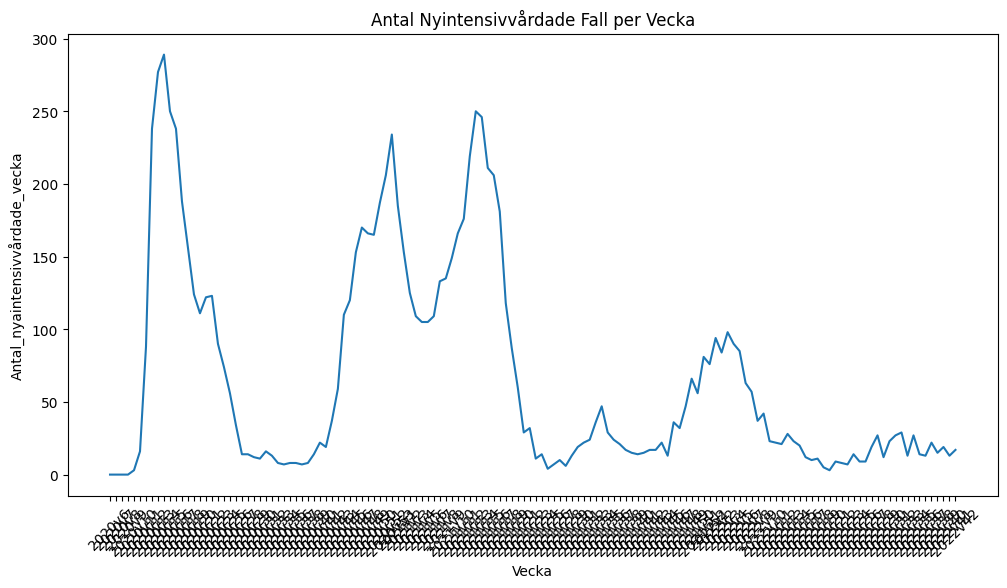

In [32]:
# KPI 2: Intensivvårdade Fall per Vecka
# Antag att 'Antal_nyaintensivvårdade_vecka' representerar antalet nyintensivvårdade per vecka
plt.figure(figsize=(12, 6))
sns.lineplot(data=veckodata_riket, x='Vecka', y='Antal_nyaintensivvårdade_vecka')
plt.title('Antal Nyintensivvårdade Fall per Vecka')
plt.xticks(rotation=45)
plt.show()



I KPI 3 skapade jag en graf där man kan se hur många som vaccinerade sig med dos 1 baserat på åldersgrupp i procent. Datan verkar logisk eftersom att desto äldre man blir desto värre blir man påverkad av covid-19. Men som lägst var det 55% som vaccinerade sig från barn mellan 12-15 år. Och som högst så ser man att 96 % av alla över 90 år vaccinerade sig.

In [33]:
# Gruppera data efter åldersgrupp och beräkna andelen vaccinerade
vaccinations_täckning_per_ålder = Vaccinerade_kommun_ålder.groupby('Ålder').sum()
vaccinations_täckning_per_ålder['Andel_minst_1_dos'] = (vaccinations_täckning_per_ålder['Antal minst 1 dos'] / vaccinations_täckning_per_ålder['Befolkning']) * 100

# Skapa ett stapeldiagram för att visa vaccinationstäckningen per åldersgrupp
fig = px.bar(vaccinations_täckning_per_ålder, x=vaccinations_täckning_per_ålder.index, y='Andel_minst_1_dos', title='Vaccinationstäckning per Åldersgrupp')
fig.show()
